In [1]:
import cv2
import imutils
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from os import listdir
import time    
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import os
from os.path import join
from keras.preprocessing.image import img_to_array
from PIL import ImageEnhance
import imageio

ModuleNotFoundError: No module named 'cv2'

In [6]:
augmented_data_path = 'C:/Users/Aishwarya K/Desktop/Brain tumor detection/BT_Detection/'
yes_path='C:/Users/Aishwarya K/Desktop/Brain tumor detection/BT_Detection/BT_Detection/originial_data/yes'
no_path='C:/Users/Aishwarya K/Desktop/Brain tumor detection/BT_Detection/BT_Detection/originial_data/no'

In [7]:
def augmentation(file_dir, n_generated_samples, save_to_dir):
    data_gen = ImageDataGenerator(rotation_range=10, 
                                  width_shift_range=0.1, 
                                  height_shift_range=0.1, 
                                  shear_range=0.1,     
                                  brightness_range=(0.3, 1.0),
                                  horizontal_flip=True, 
                                  vertical_flip=True, 
                                  fill_mode='nearest'
                                 )

    for filename in listdir(file_dir):
        image = cv2.imread(file_dir + '\\' + filename) 
        image = image.reshape((1,)+image.shape) 
        save_prefix = 'aug_' + filename[:-4] 
        i=0
        for batch in data_gen.flow(x=image, batch_size=1, save_to_dir=save_to_dir, save_prefix=save_prefix, 
                                   save_format='jpg'):
            i += 1
            if i > n_generated_samples:
                break
                
def time_elapsed(sec):    
    h = int(sec / (60 * 60))
    m = int((sec % (60 * 60)) / 60)
    s = sec % 60
    return f"{h}:{m}:{round(s,1)}"

In [13]:
start_time = time.time()
augmentation(file_dir=yes_path, n_generated_samples=6, save_to_dir=augmented_data_path+'yes')
augmentation(file_dir=no_path, n_generated_samples=10, save_to_dir=augmented_data_path+'no')
end_time = time.time()
execution_time = (end_time - start_time)
print(f"Elapsed time: {time_elapsed(execution_time)}")

Elapsed time: 0:3:55.5


In [8]:
def dataset(main_path): 
    yes_path = main_path+'yes'
    no_path = main_path+'no'
    m_pos = len(listdir(yes_path)) 
    m_neg = len(listdir(no_path))  
    m = (m_pos+m_neg)              
    pos_prec = (m_pos* 100.0)/ m
    neg_prec = (m_neg* 100.0)/ m
    print(f"Number of examples: {m}")
    print(f"Percentage of positive examples: {pos_prec}%, number of pos examples: {m_pos}") 
    print(f"Percentage of negative examples: {neg_prec}%, number of neg examples: {m_neg}")

dataset(augmented_data_path)

Number of examples: 2159
Percentage of positive examples: 50.16211208893006%, number of pos examples: 1083
Percentage of negative examples: 49.83788791106994%, number of neg examples: 1076


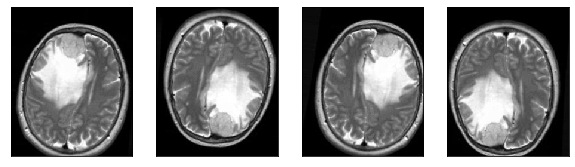

In [9]:
image= Image.open('C:/Users/Aishwarya K/Desktop/Brain tumor detection/BT_Detection/BT_Detection/augmented_data/yes/aug_Y36_0_1185.jpg').convert("L")
arr=np.asarray(image)
plt.figure(figsize=(10,3))
plt.subplot(141), plt.imshow(arr,cmap='gray',vmin=0,vmax=255)
plt.xticks([]), plt.yticks([])

image= Image.open('C:/Users/Aishwarya K/Desktop/Brain tumor detection/BT_Detection/BT_Detection/augmented_data/yes/aug_Y36_0_2949.jpg').convert("L")
arr=np.asarray(image)
plt.subplot(142), plt.imshow(arr,cmap='gray',vmin=0,vmax=255)
plt.xticks([]), plt.yticks([])

image= Image.open('C:/Users/Aishwarya K/Desktop/Brain tumor detection/BT_Detection/BT_Detection/augmented_data/yes/aug_Y36_0_4092.jpg').convert("L")
arr=np.asarray(image)
plt.subplot(143), plt.imshow(arr,cmap='gray',vmin=0,vmax=255)
plt.xticks([]), plt.yticks([])

image= Image.open('C:/Users/Aishwarya K/Desktop/Brain tumor detection/BT_Detection/BT_Detection/augmented_data/yes/aug_Y36_0_4206.jpg').convert("L")
arr=np.asarray(image)
plt.subplot(144), plt.imshow(arr,cmap='gray',vmin=0,vmax=255)
plt.xticks([]), plt.yticks([])

plt.show()

In [28]:
image_datagen=ImageDataGenerator(rescale=1./255)
i=0
for batch in image_datagen.flow_from_directory('C:/Users/User1/Desktop/BT_Detection/preprocess/shuffle/shuffling/to9/yes',
                                               target_size = (380,380),
                                               color_mode='grayscale',
                                               batch_size=1,
                                               shuffle=True,
                                               save_to_dir='C:/Users/User1/Desktop/BT_Detection/preprocess/shuffle/to/yes/yes',
                                               save_format='jpg'):
    i += 1
    if i >= 1083:
        break
   

i=0        
for batch in image_datagen.flow_from_directory('C:/Users/User1/Desktop/BT_Detection/preprocess/shuffle/shuffling/to9/no',
                                               target_size = (380,380),
                                               color_mode='grayscale',
                                               batch_size=1,
                                               shuffle=True,
                                               save_to_dir='C:/Users/User1/Desktop/BT_Detection/preprocess/shuffle/to/no/no',
                                               save_format='jpg'):
    i += 1
    if i >= 1076:
        break

Found 1083 images belonging to 1 classes.
Found 1076 images belonging to 1 classes.


In [42]:
image_dir='C:/Users/User1/Desktop/BT_Detection/preprocess/shuffle/to/yes/yes'
image_dirr='C:/Users/User1/Desktop/BT_Detection/preprocess/grayscale/yes'
for root,dirs,files in os.walk(image_dir):
    for file in files:
        if file.endswith('jpg') or file.endswith('png'):
            path=os.path.join(root,file)
            img=Image.open(path).convert('L')
            img = img.resize((380,380), Image.ANTIALIAS)
            dstPath=join(image_dirr,file)
            img.save(dstPath)

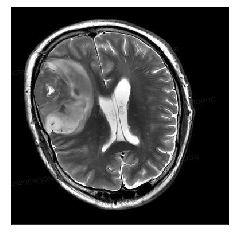

width:   380
height:  380
(380, 380, 1)


In [13]:
image= Image.open('C:/Users/User1/Desktop/BT_Detection/preprocess/grayscale/yes/_4_4247206.jpg')
arr=np.asarray(image)
plt.imshow(arr,cmap='gray',vmin=0,vmax=255)
plt.xticks([]), plt.yticks([])
plt.show()

im = cv2.imread('C:/Users/User1/Desktop/BT_Detection/preprocess/grayscale/yes/_4_4247206.jpg',cv2.IMREAD_GRAYSCALE)
h, w = im.shape
print('width:  ', w)
print('height: ', h)
img_array = img_to_array(im)
print(img_array.shape)

In [118]:
image_dir='C:/Users/User1/Desktop/BT_Detection/preprocess/grayscale/yes'
image_dirr='C:/Users/User1/Desktop/BT_Detection/preprocess/filter/yes'
for root,dirs,files in os.walk(image_dir):
    for file in files:
        if file.endswith('jpg') or file.endswith('png'):
            path=os.path.join(root,file)
            img=Image.open(path)
            image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            figure_size = 9  
            new_image_gauss = cv2.GaussianBlur(image, (figure_size, figure_size),0)
            dstPath=join(image_dirr,file)
            img1 = Image.fromarray(new_image_gauss)
            img1.save(dstPath)

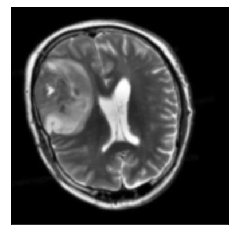

In [15]:
image= Image.open('C:/Users/User1/Desktop/BT_Detection/preprocess/filter/yes/_4_4247206.jpg')
arr=np.asarray(image)
plt.imshow(arr,cmap='gray',vmin=0,vmax=255)
plt.xticks([]), plt.yticks([])
plt.show()

In [5]:
def background_cropping(image, plot=False):
    thresh = cv2.threshold(image, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2) 
    thresh = cv2.dilate(thresh, None, iterations=2)

    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            
    return new_image

image_dir='C:/Users/User1/Desktop/BT_Detection/preprocess/filter/yes'
image_dirr='C:/Users/User1/Desktop/BT_Detection/preprocess/crop/yes'
for root,dirs,files in os.walk(image_dir):
    for file in files:
        if file.endswith('jpg') or file.endswith('png'):
            path=os.path.join(root,file)
            img=Image.open(path)
            image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            new_img = background_cropping(image, True)
            dstPath=join(image_dirr,file)
            img1 = Image.fromarray(new_img)
            img1 = img1.resize((380,380), Image.ANTIALIAS)
            img1.save(dstPath)

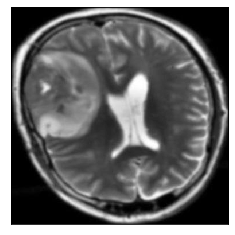

In [17]:
image= Image.open('C:/Users/User1/Desktop/BT_Detection/preprocess/crop/yes/_4_4247206.jpg')
arr=np.asarray(image)
plt.imshow(arr,cmap='gray',vmin=0,vmax=255)
plt.xticks([]), plt.yticks([])
plt.show()

In [18]:
image_dir='C:/Users/User1/Desktop/BT_Detection/preprocess/crop/yes'
image_dirr='C:/Users/User1/Desktop/BT_Detection/preprocess/enhance1/yes'
for root,dirs,files in os.walk(image_dir):
    for file in files:
        if file.endswith('jpg') or file.endswith('png'):
            path=os.path.join(root,file)
            img=Image.open(path)
            enh_bri = ImageEnhance.Brightness(img) 
            brightness = 1.3
            image_brightened = enh_bri.enhance(brightness)
            enh_col = ImageEnhance.Color(image_brightened) 
            color = 1.5
            image_colored = enh_col.enhance(color)
            enh_con = ImageEnhance.Contrast(image_colored) 
            contrast = 1.3
            image_contrasted = enh_con.enhance(contrast)
            enh_sha = ImageEnhance.Sharpness(image_contrasted) 
            sharpness = 3.0
            image_sharped = enh_sha.enhance(sharpness)
            dstPath=join(image_dirr,file)
            image_sharped.save(dstPath)

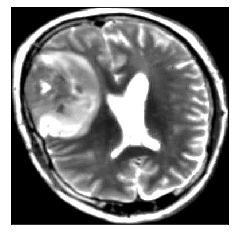

In [19]:
image= Image.open('C:/Users/User1/Desktop/BT_Detection/preprocess/enhance1/yes/_4_4247206.jpg').convert("L")
arr=np.asarray(image)
plt.imshow(arr,cmap='gray',vmin=0,vmax=255)
plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
image_dir='C:/Users/User1/Desktop/BT_Detection/preprocess/enhance1/yes'
image_dirr='C:/Users/User1/Desktop/BT_Detection/preprocess/enhance2/yes'
for root,dirs,files in os.walk(image_dir):
    for file in files:
        if file.endswith('jpg') or file.endswith('png'):
            path=os.path.join(root,file)
            im = imageio.imread(path)
            im = im/255.0
            im_power_law_transformation = cv2.pow(im,1.5)
            img1 = Image.fromarray(np.uint8(im_power_law_transformation * 255))            
            img1 = img1.convert("L")
            dstPath=join(image_dirr,file)
            img1.save(dstPath)

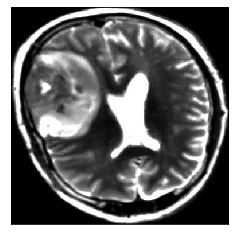

In [20]:
image= Image.open('C:/Users/User1/Desktop/BT_Detection/preprocess/enhance2/yes/_4_4247206.jpg').convert("L")
arr=np.asarray(image)
plt.imshow(arr,cmap='gray',vmin=0,vmax=255)
plt.xticks([]), plt.yticks([])
plt.show()

In [1]:
for count, filename in enumerate(os.listdir("C:/Users/User1/Desktop/BT_Detection/test/yes/")):
    count=count+1
    dst =str(count) + ".jpg"
    src ='C:/Users/User1/Desktop/BT_Detection/test/yes/'+ filename 
    dst ='C:/Users/User1/Desktop/BT_Detection/test/yes/'+ dst 
    os.rename(src, dst)